In [14]:
import numpy as np

from kitaev_ladder_snake1 import load_data

from utility import linspace


from tenpy.networks.site import SpinSite
from tenpy.networks.mps import TransferMatrix
import tenpy.linalg.np_conserved as npc

In [9]:
psi = load_data(chi=64, Jx=0.5, Jy=0.5, Jz=1.0, L=2, prefix='Spin1_full_map_high_precision/')['psi'].copy()



In [20]:
def detect_SPT_D2(psi):
    
    op_list = ['Sx', 'Sy']
    U_list = []
    
    for op in op_list:
        
        
        s = SpinSite(S=1, conserve=None)
        op = npc.expm(1.j * (np.pi) * s.get_op(op))
        
        # First of all, save a copy of the input wavefunction psi
        psi_copy = psi.copy()
        for i in range(psi_copy.L):
            psi_copy.apply_local_op(i, op)
        
        TM = TransferMatrix(psi, psi_copy)
        eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
        if not np.allclose(np.abs(eta), 1, atol=0.01):
            return 0
        
        U = G[0]
        Uop = U.split_legs()
        chi=(Uop.shape[0])
        Uop *= np.sqrt(chi) # rescale it
        U_list.append(Uop)

    U1 = U_list[0]
    U2 = U_list[1]
    U12 = npc.tensordot(U1, U2, axes=([1], [0]))
    U21 = npc.tensordot(U2, U1, axes=([1], [0]))
    return npc.inner(U12, U21.conj()) / chi

In [21]:
def detect_SPT_D2_upper_Z(psi):
    
#     op_list = ['Sigmax', 'Sigmay']
    U_list = []
    
    op = 'Sz'
    s = SpinSite(S=1, conserve=None)
    op = npc.expm(1.j * (np.pi) * s.get_op(op))
    
    
    ###### The upper ######
    # First of all, save a copy of the input wavefunction psi
    psi_copy = psi.copy()
    
    # Then calculate the specific properties of the wavefunction
    N = psi_copy.L // 4 # The number of unicells
    for i in range(N):
        psi_copy.apply_local_op(2*i, op)
        psi_copy.apply_local_op(2*i+3, op)

    TM = TransferMatrix(psi, psi_copy)
    eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
    if not np.allclose(np.abs(eta), 1, atol=0.01):
        return 0
    
    
    U = G[0]
    Uop = U.split_legs()
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    U_list.append(Uop)

    ###### The lower ######
    # First of all, save a copy of the input wavefunction psi
    psi_copy = psi.copy()
    
    # Then calculate the specific properties of the wavefunction
    N = psi_copy.L // 4 # The number of unicells
    for i in range(N): # apply the operators
        psi_copy.apply_local_op(2*i+1, op)
        psi_copy.apply_local_op(2*i+2, op)

    TM = TransferMatrix(psi, psi_copy)
    eta, G = TM.eigenvectors(num_ev=1)
#         if not np.allclose(eta, 1):
#             print(f'eta={eta}')
#             raise ValueError('The largest eigenvalue of the transfer matrix is not 1!')
    if not np.allclose(np.abs(eta), 1, atol=0.01):
        return 0
    
    
    U = G[0]
    Uop = U.split_legs()
    chi=(Uop.shape[0])
    Uop *= np.sqrt(chi) # rescale it
    U_list.append(Uop)
        
    
    U1 = U_list[0]
    U2 = U_list[1]
    U12 = npc.tensordot(U1, U2, axes=([1], [0]))
    U21 = npc.tensordot(U2, U1, axes=([1], [0]))
    return npc.inner(U12, U21.conj()) / chi

In [22]:
detect_SPT_D2(psi)

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


(1.000000156832415+5.639228061588096e-17j)

In [24]:
psi = load_data(chi=64, Jx=1.5, Jy=0.5, Jz=1.0, L=2, prefix='Spin1_full_map_high_precision/')['psi'].copy()

print("XY = ", detect_SPT_D2(psi))
print("ZZ = ", detect_SPT_D2_upper_Z(psi))

XY =  (1.0000001568324162+4.229421046191072e-17j)
ZZ =  (1.0001033940601671+7.04903507698512e-17j)


/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


In [27]:
psi = load_data(chi=64, Jx=0.75, Jy=0.75, Jz=1.0, L=2, prefix='Spin1_full_map_high_precision/')['psi'].copy()

print("XY = ", detect_SPT_D2(psi))
print("ZZ = ", detect_SPT_D2_upper_Z(psi))

XY =  (0.9999999999999999-1.3877787807814457e-17j)
ZZ =  (1.0000000000000018+0j)


/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


In [28]:
psi = load_data(chi=64, Jx=1.0, Jy=1.0, Jz=1.0, L=2, prefix='Spin1_full_map_high_precision/')['psi'].copy()

print("XY = ", detect_SPT_D2(psi))
print("ZZ = ", detect_SPT_D2_upper_Z(psi))

XY =  0
ZZ =  0


In [29]:
psi = load_data(chi=64, Jx=0.5, Jy=0.5, Jz=1.0, L=2, prefix='Spin1_full_map_high_precision/')['psi'].copy()

print("XY = ", detect_SPT_D2(psi))
print("ZZ = ", detect_SPT_D2_upper_Z(psi))

XY =  (1.0000657885919018-1.644774851296528e-17j)
ZZ =  (1.0000657886208022+0j)


/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'


In [31]:
n = 100
Jx_list = linspace(1.0, 1.99, n)
Jy_list = linspace(1.0, 0.01, n)
psi_list = [load_data(chi=64, Jx=Jx_list[i], Jy=Jy_list[i], Jz=1.0, L=2, prefix='Spin1_full_map_high_precision/')['psi'].copy() for i in range(n)]

In [32]:
XY_list = [detect_SPT_D2(psi) for psi in psi_list]

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: FutureWarning: inner(): `axes` currently defaults to 'range', will change to 'labels'
/home/jerry/anaconda3/lib/py

In [33]:
import matplotlib.pyplot as plt

/home/jerry/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


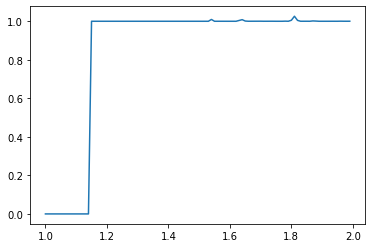

In [34]:
plt.plot(Jx_list, XY_list)